In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

sns.set(style="darkgrid")

In [2]:
tedData = pd.read_csv("ted_main.csv")
tedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null int64
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(7), object(10)
memory usage: 338.8+ KB


| Колонка | Описание |
| --- | --- |
| comments | Кол-во комментариев |
| description | Описание |
| duration | Длительность, с |
| event | Событие |
| film_date | Дата выступления |
| languages | Кол-во языков |
| main_speaker | Главный докладчик |
| name | Название |
| num_speaker | Кол-во докладчиков |
| published_date | Дата публикации |
| ratings | Оценки |
| related_talks | Связанные видео |
| speaker_occupation | Род деятельности докладчика |
| tags | Тэги |
| title | Заголовок |
| url | url-адрес |
| views | Кол-во просмотров |


In [3]:
representativeCols = ['duration', 'film_date', 'main_speaker', 'event', 'title', 'views']

tedData.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


### Гистограмма распределения просмотров

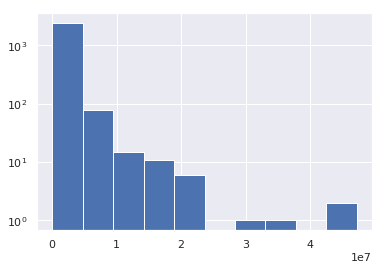

In [4]:
plt.hist(tedData['views'], log=True)
plt.show()

<Figure size 2160x1008 with 0 Axes>

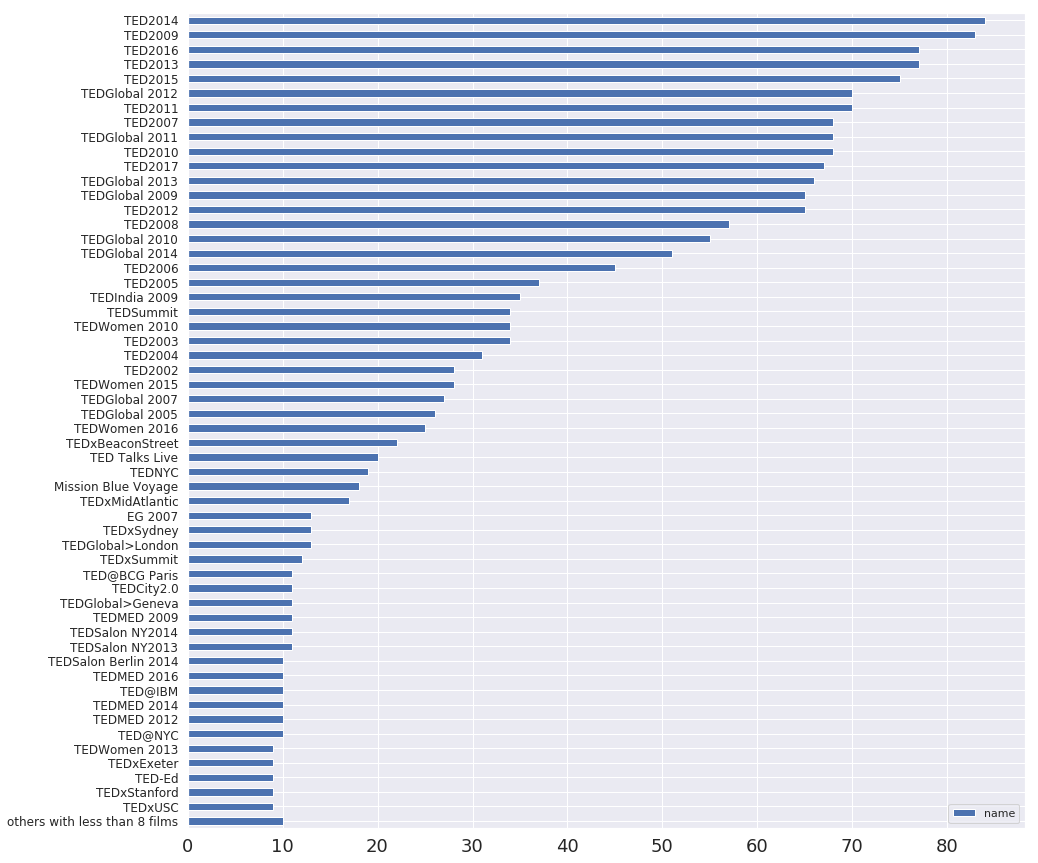

In [83]:
otherData = pd.DataFrame([{'name': 10}], index = ['others with less than 8 films'])
eventData = pd.DataFrame(
    tedData[
        tedData.groupby(['event'])['name'].transform('count') > 8
    ].groupby(['event'])['name'].count().sort_values(ascending=True)
)
totalEventData = pd.concat([otherData, eventData], axis=0)

fig = plt.gcf()
fig.set_size_inches(30,14)

totalEventData.plot.barh(figsize=(15,15))
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.show()